<a href="https://colab.research.google.com/github/UNB-TME-6017/intro-to-deep-learning-wk-5/blob/main/CNN_Introduction_Pure_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Neural Networks and CNNs

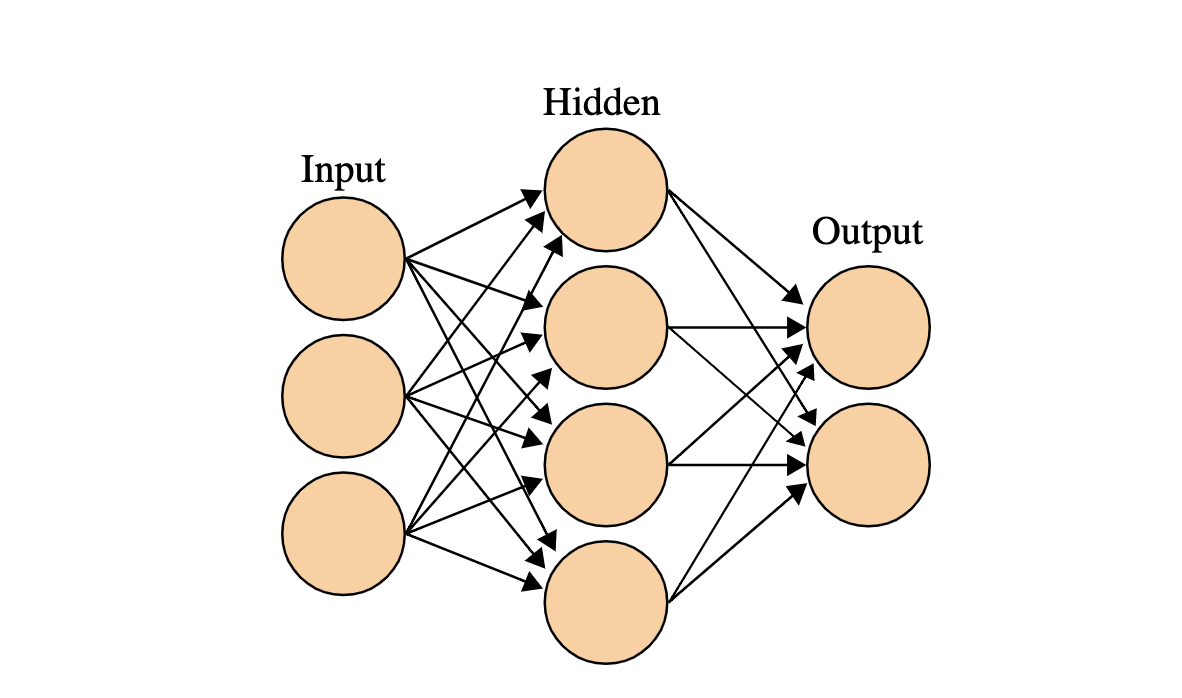

A neural network is a network or circuit of neurons, or in a modern sense, an artificial neural network, composed of artificial neurons or nodes. Thus a neural network is either a biological neural network, made up of real biological neurons, or an artificial neural network, for solving artificial intelligence (AI) problems. The connections of the biological neuron are modeled as weights. A positive weight reflects an excitatory connection, while negative values mean inhibitory connections. 

The output from each neuron is sent to other neurons via axons. The axons of neurons in one layer connect to neurons in another layer. The connections are weighted such that some are stronger than others. The weighted connections are summed and passed through a non-linear function (such as the sigmoid function) to get the neuron's output. The output from one layer becomes the input to the next layer. This process is repeated until the outputs are generated.

In supervised learning, the output from the network are compared to the desired outputs of a system.  The error is calculated by taking the difference between then actual output of the network and the desired or target outputs of the system. This error is then propagated backwards through the network, adjusting the weights as it goes. This is called backpropagation. The whole network is then adjusted, such that the error is reduced. This is called training the network. The weights are adjusted such that the network generates the correct outputs for the given inputs. The whole process is repeated until the network is trained well enough. The network is now ready to be used. The network can be used to make predictions, given new inputs.

# Convolutional Neural Network

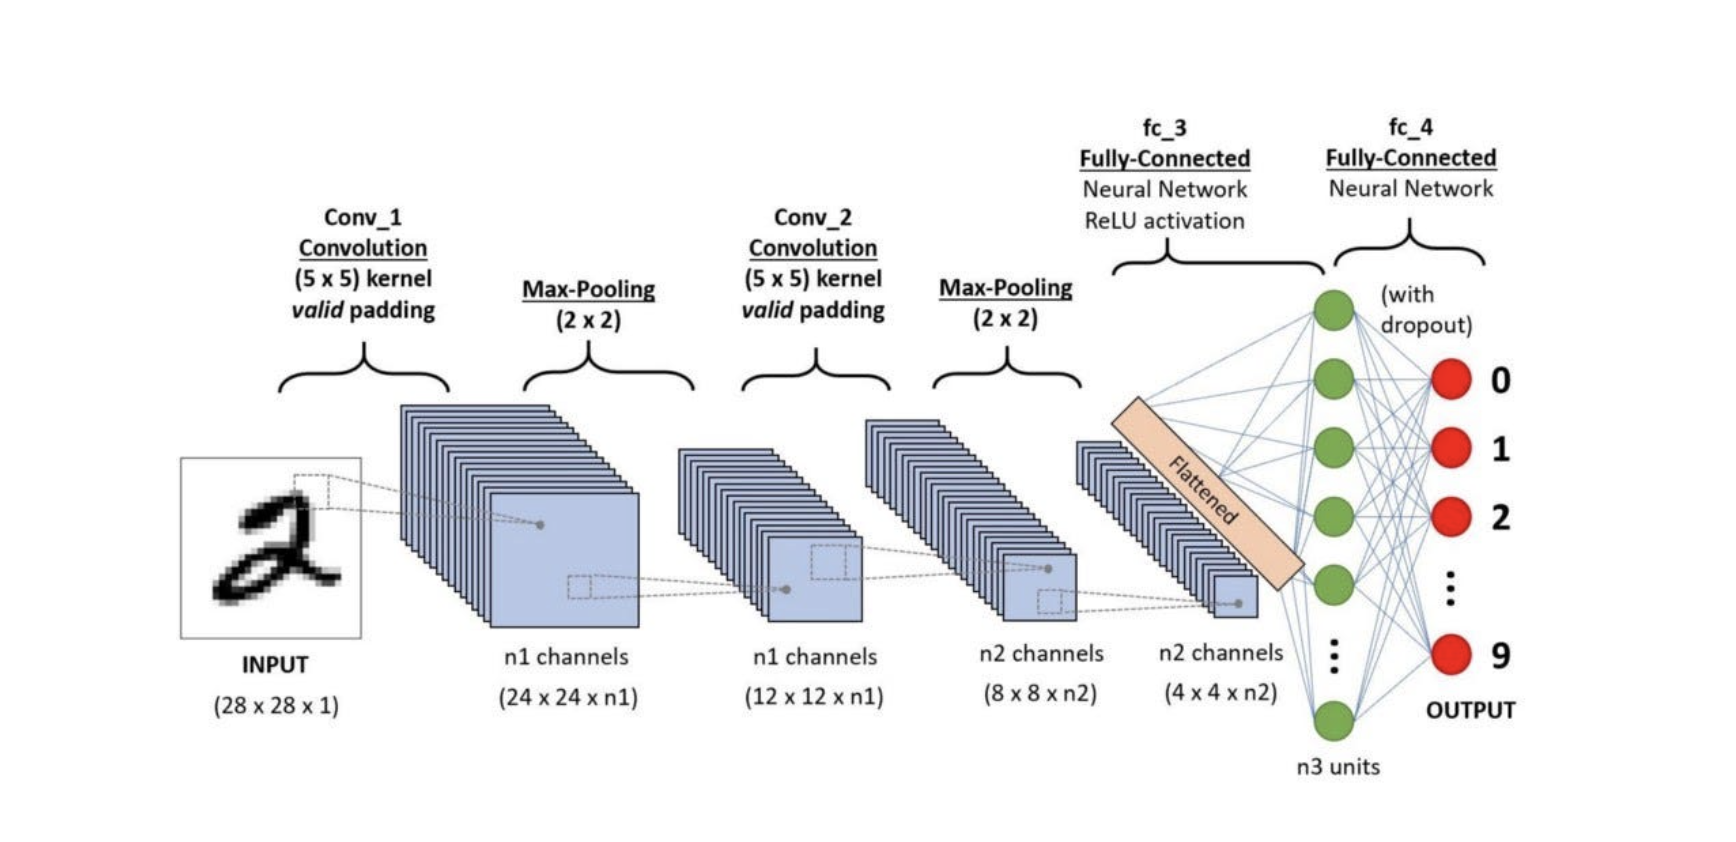

source: https://nordinzakaria.medium.com/backpropagation-in-cnn-a-mathematically-explicit-exposition-3f723f0ad9a0

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.datasets import mnist

In [ ]:
# create a python function to get the mnist dataset
def get_mnist_dataset():
  # get the mnist dataset
  (x_train, y_train), (x_test, y_test) = mnist.load_data()
  # reshape the dataset
  x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
  x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
  # convert the dataset to float32
  x_train = x_train.astype('float32')
  x_test = x_test.astype('float32')
  # normalize the dataset
  x_train /= 255
  x_test /= 255
  # return the dataset
  return x_train, y_train, x_test, y_test

## Single Neuron

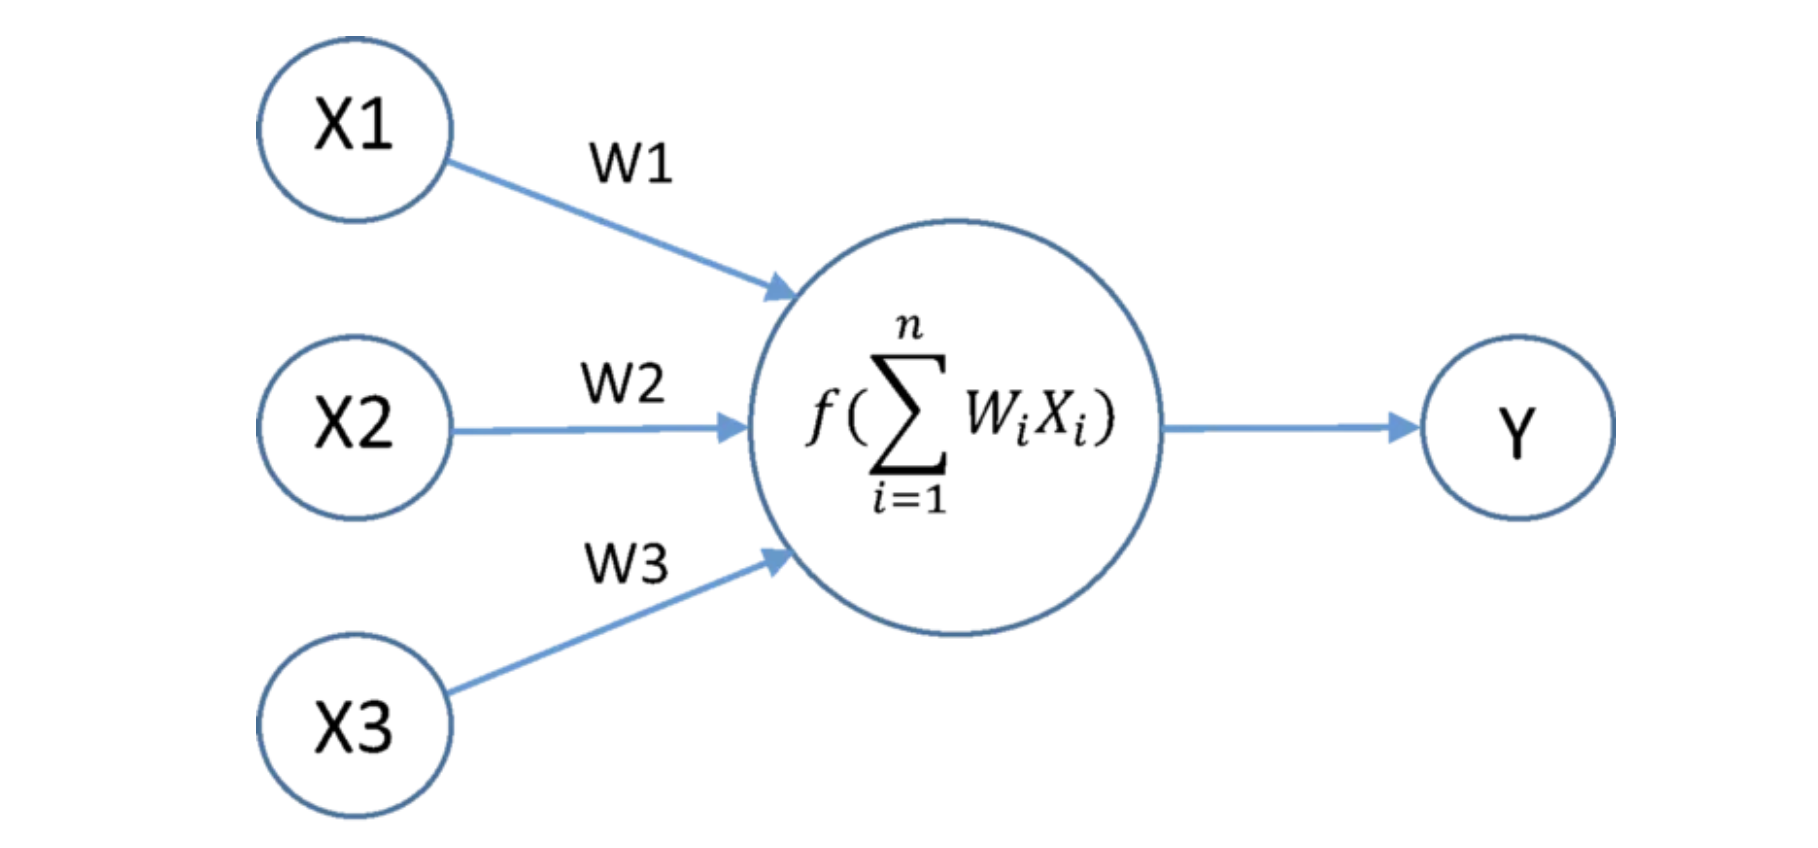

source: https://medium.com/analytics-vidhya/neural-network-activation-function-c53a3f334364

In [ ]:
def single_neuron(image, kernel):
  # get the image dimensions
  height, width, channels = image.shape
  print(image.shape, kernel.shape)
  # get the kernel dimensions
  kernel_height, kernel_width, kernel_channels = kernel.shape
  # create an empty output image
  output = np.zeros((height, width, channels), np.float)
  # loop through the image
  for y in range(height):
    for x in range(width):
      for c in range(channels):
        # get the sum of the image pixels multiplied by the kernel pixels
        output[y, x, c] = np.sum(image[y:y+kernel_height, x:x+kernel_width, c] * kernel[:, :, c])
  # return the output image
  return output

## Convolutional Layer

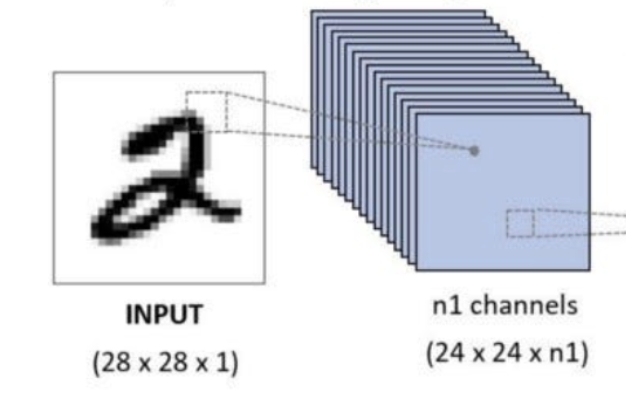

In [ ]:
# create a python function for a convolutional layer 
def convolutional_layer(image, kernels):
  # get the number of kernels
  num_kernels = len(kernels)
  # get the image dimensions
  height, width, channels = image.shape
  # get the kernel dimensions
  kernel_height, kernel_width, kernel_channels = kernels[0].shape
  # create an empty output image
  output = np.zeros((height, width, num_kernels), np.float)
  # loop through the kernels
  for i in range(num_kernels):
    # get the kernel
    kernel = kernels[i]
    # get the output image for the kernel
    output_image = single_neuron(image, kernel)
    # add the output image to the output
    output[:, :, i] = output_image[:, :, 0]
  # return the output
  return output

## Activation Functions

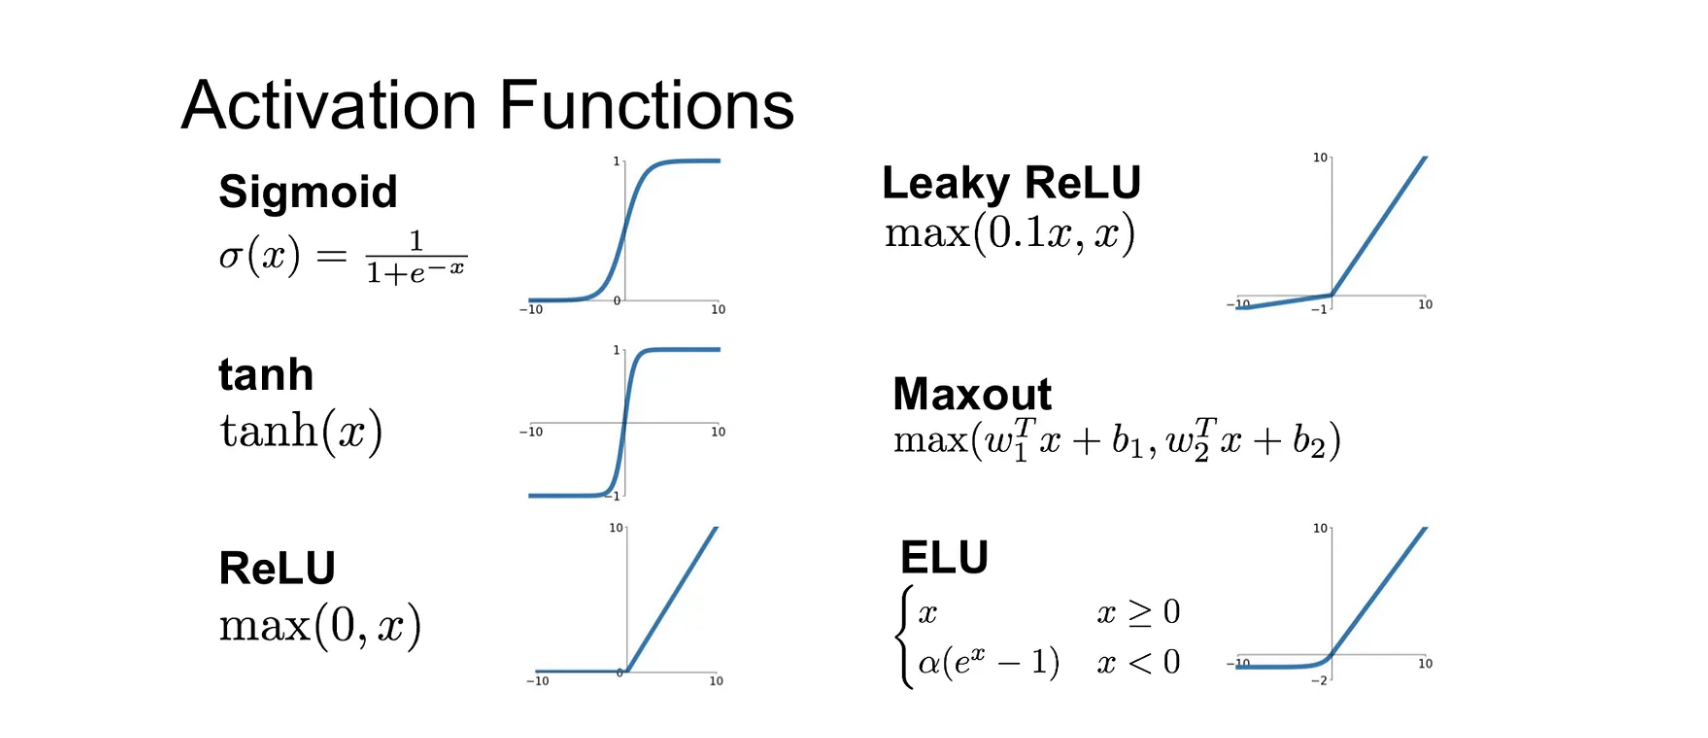

source: https://medium.com/dataseries/basic-overview-of-convolutional-neural-network-cnn-4fcc7dbb4f17

In [ ]:
# create a python function for an activation layer
def activation_layer(image, activation):
  # get the image dimensions
  height, width, channels = image.shape
  # create an empty output image
  output = np.zeros((height, width, channels), np.float)
  # loop through the image
  for y in range(height):
    for x in range(width):
      for c in range(channels):
        # get the input pixel
        input_pixel = image[y, x, c]
        # if the activation is relu
        if activation == 'relu':
          # set the output pixel to the relu of the input pixel
          output[y, x, c] = max(0, input_pixel)
        # if the activation is sigmoid
        elif activation == 'sigmoid':
          # set the output pixel to the sigmoid of the input pixel
          output[y, x, c] = 1 / (1 + np.exp(-input_pixel))
        # if the activation is tanh
        elif activation == 'tanh':
          # set the output pixel to the tanh of the input pixel
          output[y, x, c] = np.tanh(input_pixel)
        # if the activation is softmax
        elif activation == 'softmax':
          # set the output pixel to the softmax of the input pixel
          output[y, x, c] = np.exp(input_pixel) / np.sum(np.exp(image[y, x, :]))
  # return the output image
  return output

## Max Pooling

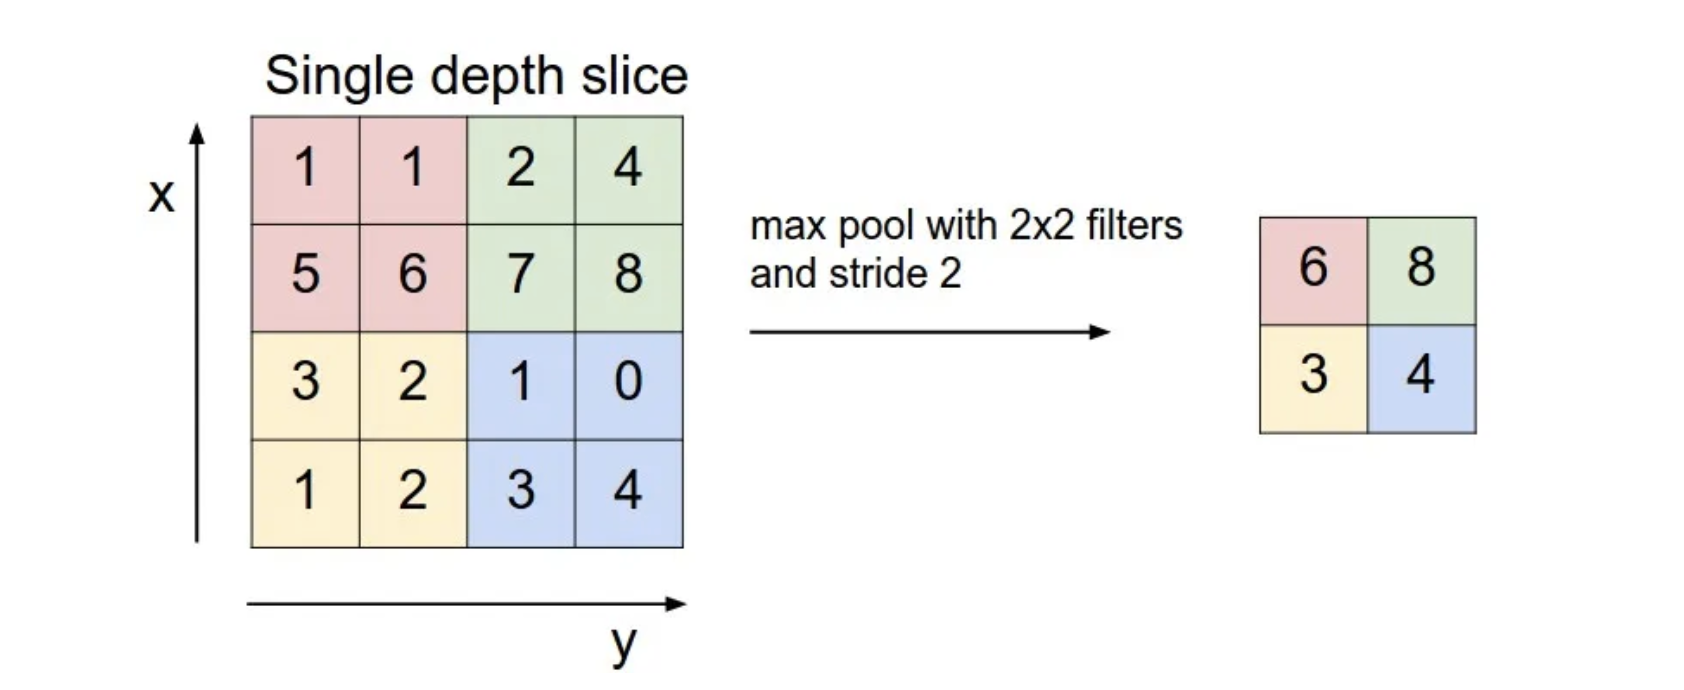

source: https://medium.com/dataseries/basic-overview-of-convolutional-neural-network-cnn-4fcc7dbb4f17

In [ ]:
# create a python function for a max pooling layer
def max_pooling_layer(image, pool_size):
  # get the image dimensions
  height, width, channels = image.shape
  # create an empty output image
  output = np.zeros((height // pool_size, width // pool_size, channels), np.float)
  # loop through the image
  for y in range(0, height, pool_size):
    for x in range(0, width, pool_size):
      for c in range(channels):
        # get the max value in the pool
        output[y // pool_size, x // pool_size, c] = np.max(image[y:y+pool_size, x:x+pool_size, c])
  # return the output image
  return output

## Drop Out

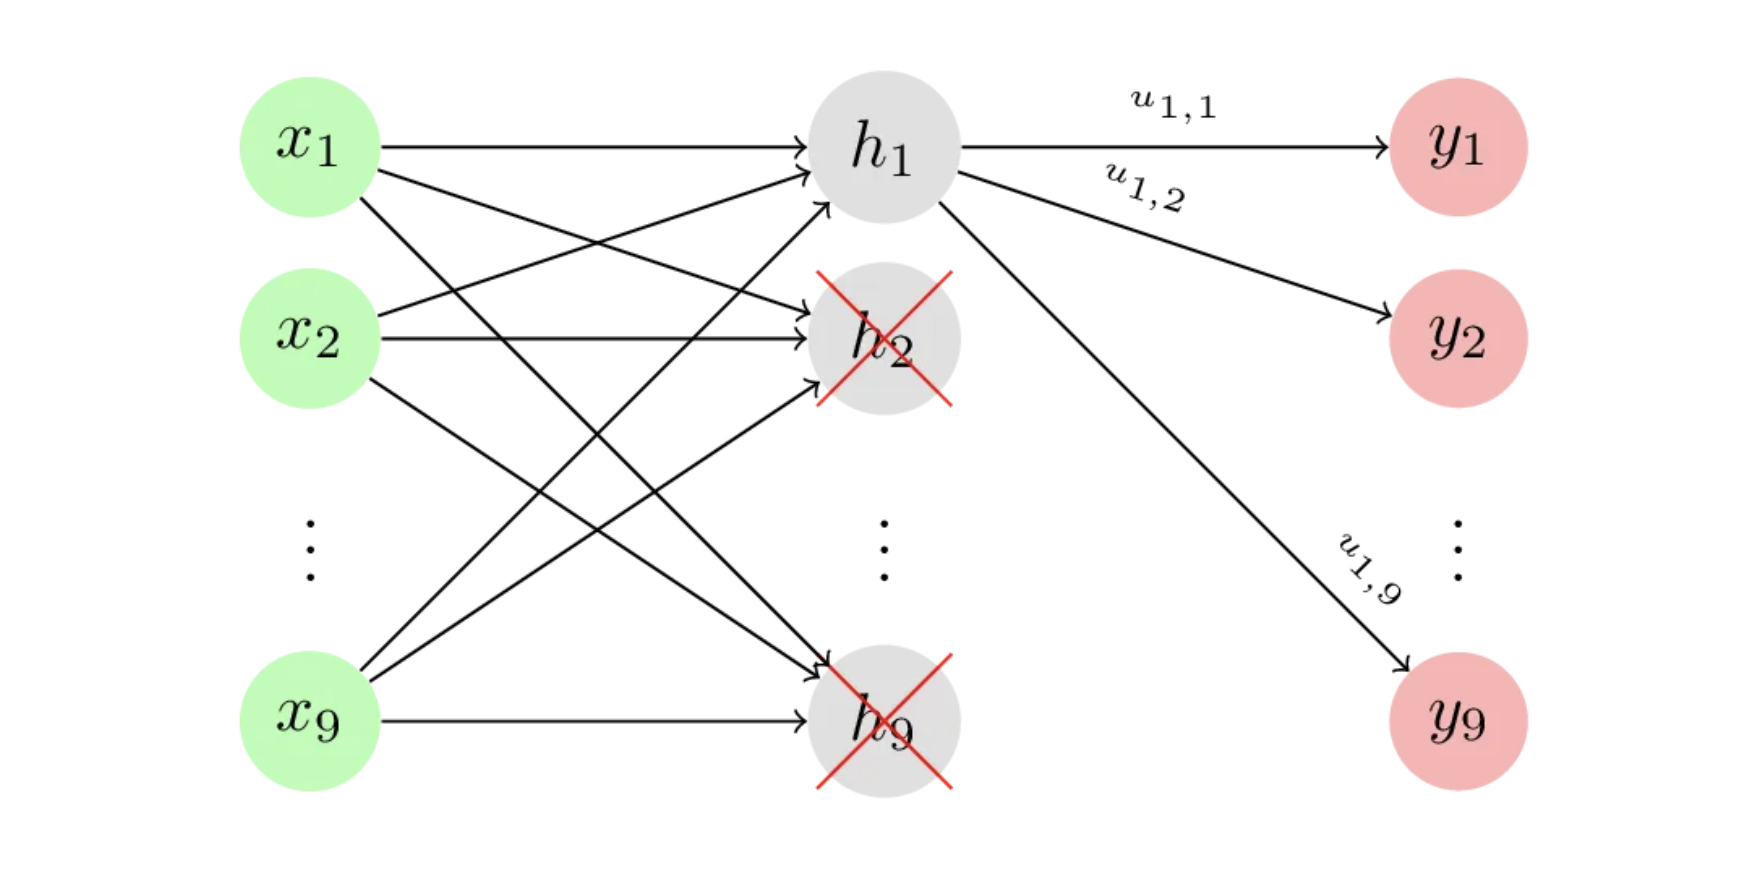

source: https://towardsdatascience.com/dropout-on-convolutional-layers-is-weird-5c6ab14f19b2

In [ ]:
# create a python function for a dropout layer
def dropout_layer(image, probability):
  # get the image dimensions
  height, width, channels = image.shape
  # create an empty output image
  output = np.zeros((height, width, channels), np.float)
  # loop through the image
  for y in range(height):
    for x in range(width):
      for c in range(channels):
        # get a random number
        random_number = np.random.rand()
        # if the random number is greater than the probability
        if random_number > probability:
          # set the output pixel to the input pixel
          output[y, x, c] = image[y, x, c]
  # return the output image
  return output

## fully Connect Layers


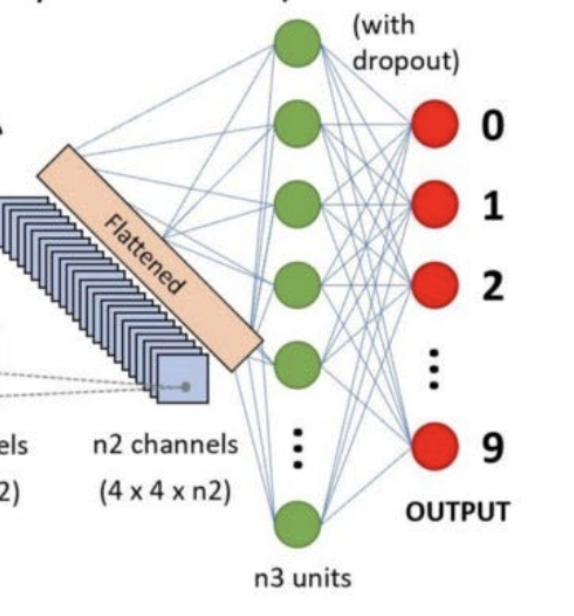

In [ ]:
# create a python function for a flatten layer
def flatten_layer(image):
  print('flatten_layer', image.shape)
  # get the image dimensions
  height, width, channels = image.shape
  return np.expand_dims(image.flatten(), axis=1)

In [ ]:
# create a python function for a fully connected layer
def fully_connected_layer(input, weights, biases):
  print('fc layer', input.shape, weights.shape, biases.shape)
  # get the input dimensions
  input_size = input.shape[0]
  # get the weight dimensions
  weight_height, weight_width = weights.shape
  # create an empty output image
  # output = np.zeros((input_size, weight_width), np.float)
  # # loop through the input
  # for y in range(input_size):
  #   for x in range(weight_width):
  #     # get the sum of the input pixels multiplied by the weight pixels
      # output[y, x] = np.sum(input[y] * weights[:, x]) + biases[x]
  # return the output image
  return np.sum(input * weights) + biases

## Softmax for Cross-Entropy Loss
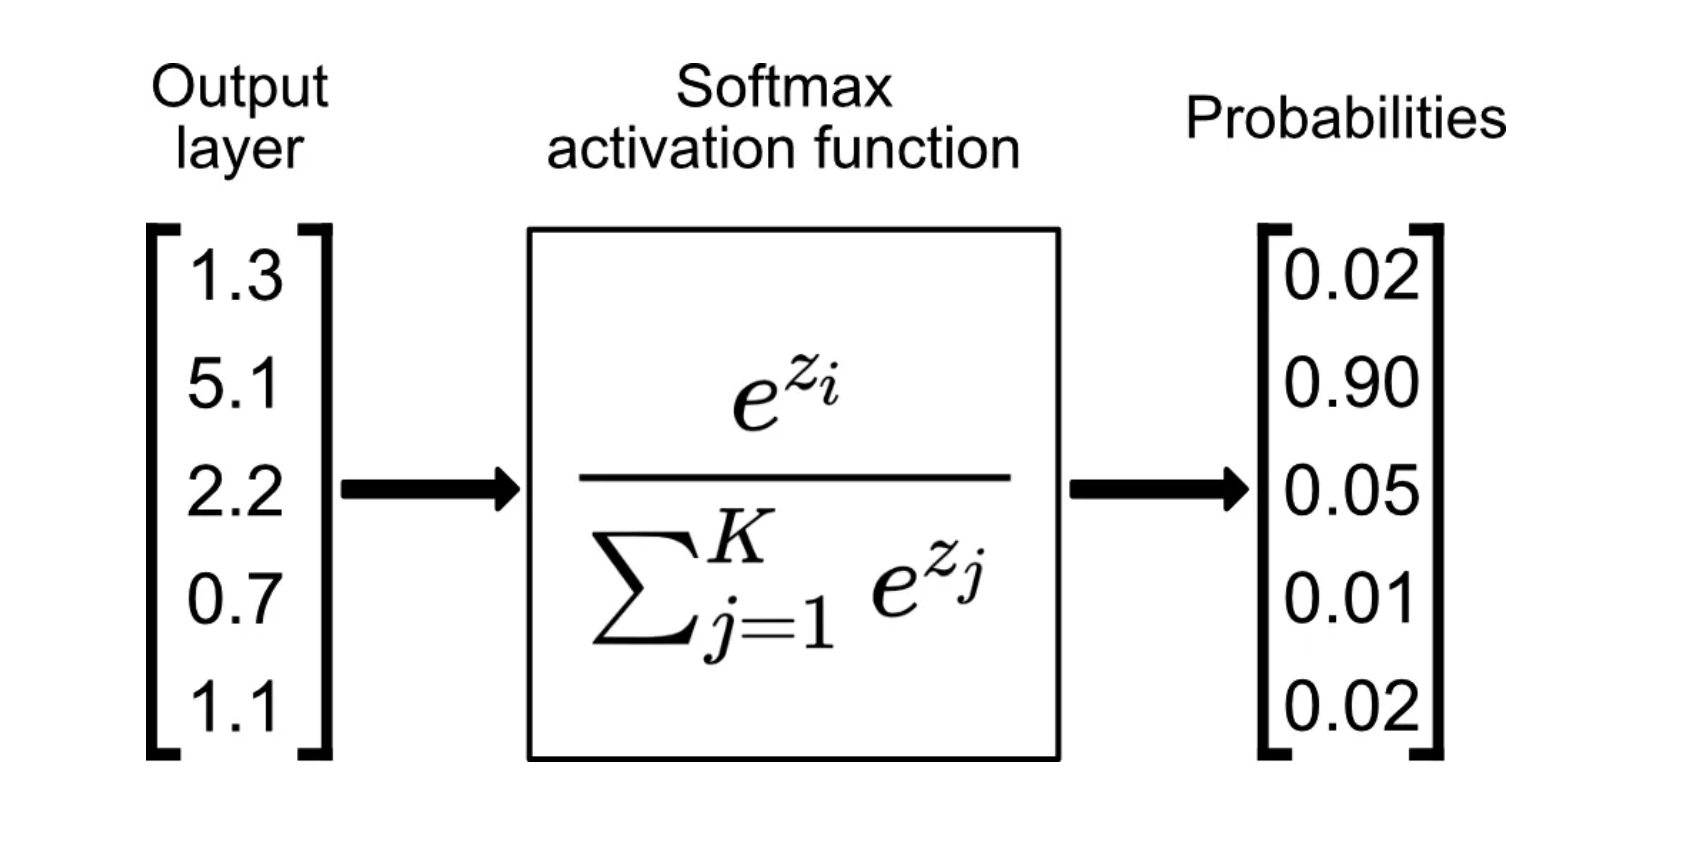

source: https://towardsdatascience.com/softmax-activation-function-explained-a7e1bc3ad60

In [ ]:
# create a python function for a softmax layer on a fully connected layer
def softmax_layer(input):
  # get the input dimensions
  input_height, input_width = input.shape
  # create an empty output image
  output = np.zeros((input_height, input_width), np.float)
  # loop through the input
  for y in range(input_height):
    for x in range(input_width):
      # set the output pixel to the softmax of the input pixel
      output[y, x] = np.exp(input[y, x]) / np.sum(np.exp(input[y, :]))
  # return the output image
  return output

# Convolutional Neural Network

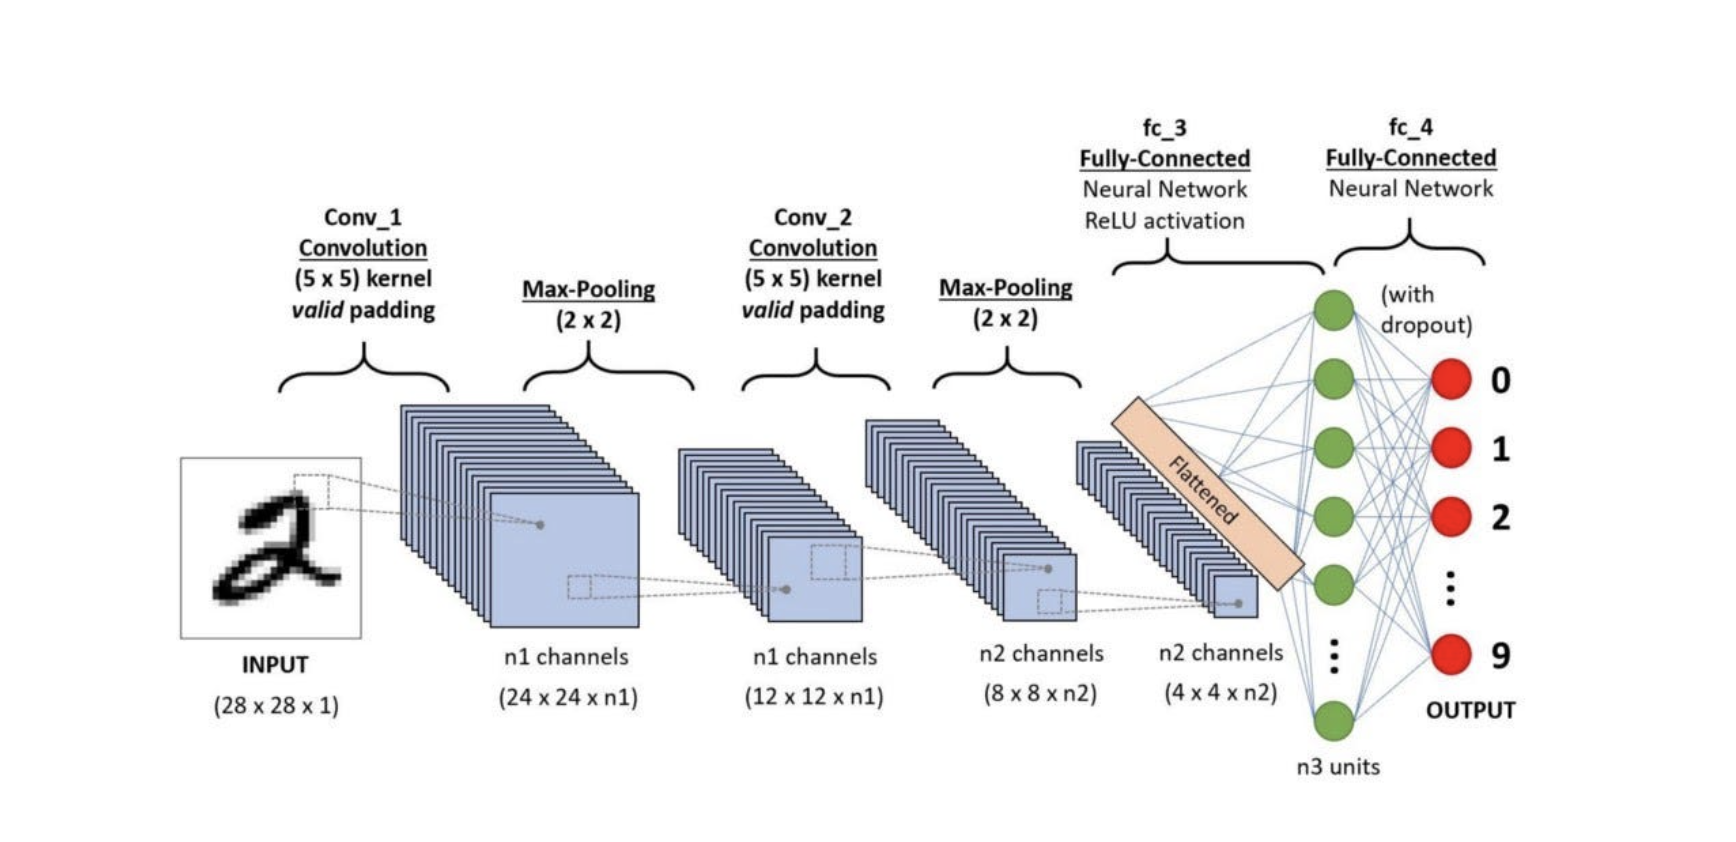

In [ ]:
# create a python function for a convolutional neural network
def convolutional_neural_network(image, kernels, pooling_size, weights, biases):
  # get the image dimensions
  height, width, channels = image.shape
  # get the kernel dimensions
  kernel_height, kernel_width, kernel_channels, kernel_number = kernels.shape
  # get convolutional layer
  convolution = convolutional_layer(image, kernels)
  # get the activation of the convolution
  activation = activation_layer(convolution, 'relu')
  # get the max pooling layer
  pooling = max_pooling_layer(activation, pooling_size)
  # get the flatten layer
  flatten = flatten_layer(pooling)
  # get the fully connected layer
  fully_connected = fully_connected_layer(flatten, weights, biases)
  # get the softmax layer
  softmax = softmax_layer(fully_connected)
  # return the output image
  return softmax

# Initialization, Training, Testing

In [ ]:
# create a python function for the forward pass
def forward_pass(image, kernels, pooling_size, weights, biases):
  # get the output image from the convolutional neural network
  output = convolutional_neural_network(image, kernels, pooling_size, weights, biases)
  # get the class with the highest probability
  class_index = np.argmax(output)
  # return the class index
  return class_index


# create a python function for the gradient descent optimizer
def gradient_descent_optimizer(image, kernels, pooling_size, weights, biases, one_hot, learning_rate):
  print('gd class index', one_hot)
  class_index = np.argmax(one_hot)
  # get the output image
  output = convolutional_neural_network(image, kernels, pooling_size, weights, biases)
  print('gd output', output, 'argmax', np.argmax(output))
  # get the class index
  predicted_class_index = np.argmax(output)
  # get the error
  error = output[0, class_index] - output[0, predicted_class_index]
  # get the delta
  delta = error * output
  print('gd delta size', delta.shape)
  # get flattened
  print('gd image size', image.shape)
  flattened = flatten_layer(max_pooling_layer(activation_layer(convolutional_layer(image, kernels), 'relu'), pooling_size))
  print('gd flattened size', flattened.shape)
  # get the weight gradients
  weight_gradients = np.dot(delta.T, flattened.T)
  # get the bias gradients
  bias_gradients = np.sum(delta, axis=0, keepdims=True)
  # get the kernel gradients
  kernel_gradients = convolutional_layer(image, delta)
  # update the weights
  weights -= learning_rate * weight_gradients.T
  # update the biases
  biases -= learning_rate * bias_gradients
  # update the kernels
  kernels -= learning_rate * kernel_gradients
  # return the kernels
  return kernels


# create a python function for the training loop
def training_loop(image, kernels, pooling_size, weights, biases, class_index, learning_rate, epochs):
  # loop through the epochs
  for i in range(epochs):
    # get the kernels
    kernels = gradient_descent_optimizer(image, kernels, pooling_size, weights, biases, class_index, learning_rate)
    # get the class index
    predicted_class_index = forward_pass(image, kernels, pooling_size, weights, biases)
    # print the class index
    print(predicted_class_index)
  # return the kernels
  return kernels


In [ ]:
# create a python function to initialize the kernels
def initialize_kernels():
  # create a list of kernels
  kernels = []
  # get the kernel dimensions
  kernel_height, kernel_width, kernel_channels = 2, 2, 1
  # loop through the kernels
  for i in range(3):
    # create a random kernel
    kernel = np.random.randn(kernel_height, kernel_width, kernel_channels)
    # append the kernel to the list of kernels
    kernels.append(kernel)
  # return the list of kernels
  return np.asarray(kernels)

# create a python function to initialize the weights
def initialize_fc_weights_and_biases(number_of_classes, n_hidden):
  # create a random weight matrix
  weights = np.random.randn(n_hidden, number_of_classes)
  # create a random bias matrix
  biases = np.random.randn(1, number_of_classes)
  # return the weights and biases
  return weights, biases
  

# creeate a python function to load the data return n samples
def load_data(n):
  # load the data
  x_train, y_train, x_test, y_test = get_mnist_dataset()
  # return the data
  return x_train[:n], y_train[:n], x_test[:n], y_test[:n]


# create a python function to preprocess the data
def preprocess_data(x_train, y_train, x_test, y_test):
  # get the number of classes
  number_of_classes = 10
  # get the shape of the training data
  height, width, channels = x_train[0].shape
  # get the shape of the test data
  test_height, test_width, test_channels = x_test[0].shape
  # reshape the training data
  x_train = x_train.reshape(x_train.shape[0], height, width, channels)
  # reshape the test data
  x_test = x_test.reshape(x_test.shape[0], test_height, test_width, test_channels)
  # convert the training data to float
  x_train = x_train.astype('float32')
  # convert the test data to float
  x_test = x_test.astype('float32')
  # normalize the training data
  x_train /= 255
  # normalize the test data
  x_test /= 255
  # convert the training labels to one hot vectors
  y_train = keras.utils.to_categorical(y_train, number_of_classes)
  # convert the test labels to one hot vectors
  y_test = keras.utils.to_categorical(y_test, number_of_classes)
  # return the data
  return x_train, y_train, x_test, y_test


# initialize and train the convolutional neural network
def train():
  # load the data
  x_train, y_train, x_test, y_test = load_data(10)
  # preprocess the data
  x_train, y_train, x_test, y_test = preprocess_data(x_train, y_train, x_test, y_test)
  # get the image
  image = x_train[0]
  # get the class index
  class_index = y_train[0]
  # get the kernels
  kernels = initialize_kernels()
  # get the weights and biases
  weights, biases = initialize_fc_weights_and_biases(10, 14*14*3)
  # get the pooling size
  pooling_size = 2
  # get the learning rate
  learning_rate = 0.01
  # get the number of epochs
  epochs = 10
  # train the convolutional neural network
  kernels = training_loop(image, kernels, pooling_size, weights, biases, class_index, learning_rate, epochs)
  # get the class index
  predicted_class_index = forward_pass(image, kernels, pooling_size, weights, biases)
  # print the class index
  print(predicted_class_index)
  # return the kernels, weights and biases
  return kernels, weights, biases, pooling_size

# train the convolutional neural network
kernels, weights, biases, pooling_size = train()

In [ ]:
# predict the class index on new data
def predict(image, kernels, pooling_size, weights, biases):
  # get the class index
  predicted_class_index = forward_pass(image, kernels, pooling_size, weights, biases)
  # return the class index
  return predicted_class_index

# create a python function to load new data
def load_new_data(index):
  # load the data
  (x_train, y_train), (x_test, y_test) = cifar10.load_data()
  # return the data
  return x_test[index], y_test[index]

#  predict the class index on new data
new_image = load_new_data(0)
result = predict(new_image, kernels, pooling_size, weights, biases)